In [1]:
using PyPlot, PyCall
using Distributions

In [2]:
function expt(a, b, σ, Y, X, Nₛ)
    S = rand(Gamma(a, 1.0/b), Nₛ)
    C = mean([exp(sum(logpdf.(Normal(s, σ), Y))) for s in S])
    curve = [exp(sum(logpdf.(Normal(mu, σ), Y))) * pdf.(Gamma(a, 1.0/b), mu) for mu in X]
    m = mean([s * exp(sum((logpdf.(Normal(s, σ), Y))))/C for s in S])
    v = mean([(s-m)^2 * exp(sum((logpdf.(Normal(s, σ), Y))))/C for s in S])
    return curve/C, m, v
end

expt (generic function with 1 method)

In [3]:
X = range(-5, 10, length=1000)

-5.0:0.015015015015015015:10.0

# Gamma distribution

\begin{align}
f(x) &= \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}} \\
 &= \frac{\lambda^k}{\Gamma(k)\theta^k}x^{k-1}e^{-\lambda x}
\end{align}


$k$: shape parameter

$\theta$: sacale parameter



$\theta = \frac{v}{\mu}$ \
$k = \frac{\mu^2}{v}$


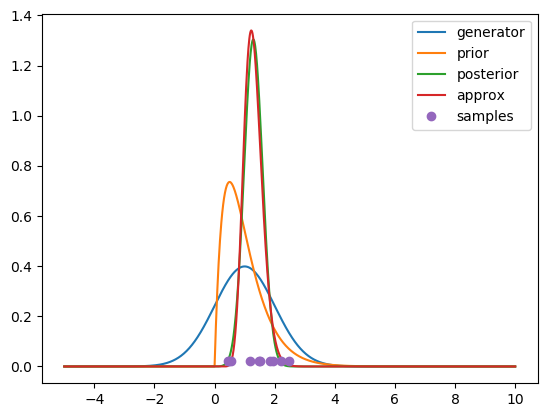

In [4]:
a = 2.0
b = 2.0
μ = 1.0
σ = 1.0

N = 10
Y = rand(Normal(μ, σ), N)

Nₛ = 100000
posterior, μₚ , vₚ = expt(a, b, σ, Y, X, Nₛ)

θ = μₚ / vₚ
k = μₚ^2 / vₚ

figure()
plot(X, pdf.(Normal(μ, σ), X))
plot(X, pdf.(Gamma(a, 1/b), X))
plot(X, posterior)
plot(X, pdf.(Gamma(k, 1/θ), X))
plot(Y, 0.02*ones(N), "o")
legend(["generator", "prior", "posterior", "approx", "samples"])
show()